In [191]:
#导入包
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#启动交互性
%matplotlib notebook

In [55]:
data_path = r"C:\Users\zhang\Desktop\p3000-fix.xyz"

with open(data_path) as f:
    str_data = f.read()

In [62]:
#在每个xyz格式下，第一行为“Atoms”，第二行为原子数“6200”从第三行开始才是原子坐标id
#所以每次就读一帧 比如在此处就是“6200+2”行 此处把str类型的表转化为行
list_data = np.array(str_data.split("\n"))

In [63]:
list_data.shape

(6208203,)

In [69]:
list_data[:10]

array(['6200        ', 'Atoms',
       'O     25.749800     0.163082      34.17320',
       'O     40.465500     1.365650      31.15460',
       'O     21.071400     4.004960      33.36090',
       'O    103.514000     7.303380      49.91040',
       'O     13.538600     8.178250       7.90386',
       'O     34.934200     3.189960      12.03740',
       'O     41.705400     7.253560      58.05970',
       'O    118.076000     2.233160      54.35430'], dtype='<U42')

In [72]:
list_data[0]

'6200        '

In [79]:
#定义当前行数为0 然后读取第零行的原子数得到原子数目id 第一行为atoms 
now_row = 0
atoms_num = int(list_data[0])

In [88]:
atoms_num

6200

In [102]:
#当前读到的此行数
now_row=0
#当前为第几帧
count = 1
#数据表的总长
len_data = len(list_data)
#表中有多少个原子
atoms_num = int(list_data[0])

while(now_row<len_data):
    print(list_data[now_row])
    #此处就找到了每一帧的头 然后可以开始处理数据了
    if(now_row+atoms_num+2>len_data):
        print("已经到了数据尾")
        break

    single_frame = list_data[now_row:now_row+atoms_num+2]
    
    #分析数据 
    ana_data(single_frame)
    #再把数据重写一份 观察结果
    write_data()
    
    #行数和计数值增长
    now_row += atoms_num + 2
    count+=1

6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        
6200        

In [123]:
frame = list_data[now_row:now_row+atoms_num+2]

In [124]:
frame[-1]

'Li    71.045100     4.250820      63.07790'

In [129]:
# 分析数据   

##思想：先设置好形成体，正则取出，先观察形成体的排列，如果“有序”再比较其他原子
#如何定义和筛选出有序：

#具体步骤
#一 给选出的形成体排序 再分组 怎么分组 再根据形成体的键长大小 比如它的pdf首峰在2.2左右 那么选个2.2*2边长的正方体区域
#二 在这个区域中 

# 等等 在排序过后 选取每个原子遍历 这个原子在六个正方向上找原子 （诚然应该有cutoff 比如5.0）找到后做基矢同方向再找
#等等 这么直接找基矢不能包括的方向太多了 我们应该以每个原子为圆心 找方向不重叠的最大圆（这个判断也很重要 ）！！！再按照每个原子的方向得到
##基矢 按照这个方向去找才比较完备 诚然 这个画的圆应该有cutoff。

#任何判断都要有一定的误差 这个值在编好程序后

####基矢的差别就是晶相的差别！！！
#如果找到了就把原子的id换了 统一换成一个可设定的名字

#####################################

formers = ['Nb','Si']
replace_cry = 'Au'

In [183]:
#####此处直接写关键的分析函数 不再纠结于细节
path = r'C:\Users\zhang\Desktop\data.txt'
df = pd.read_csv(path,sep='\s+', header=None)
df.head()

,0,1,2,3
0,Nb,47.0994,6.80739,33.8839
1,Nb,10.5670,6.48451,33.0977
2,Nb,32.1932,5.90659,50.2657
3,Nb,33.4149,1.32075,68.6931
4,Nb,48.7941,1.27417,22.5684


<IPython.core.display.Javascript object>


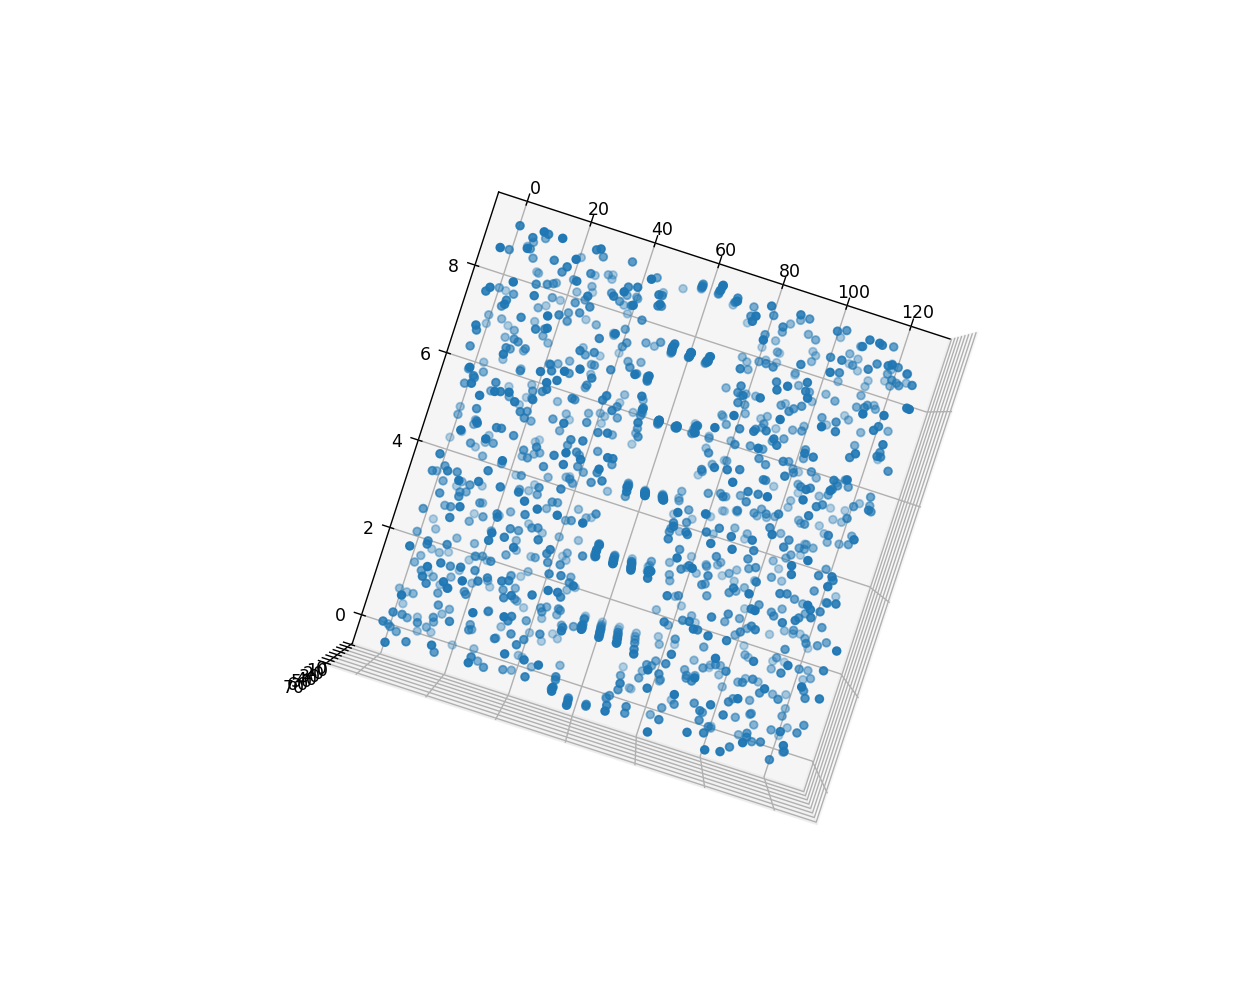

In [206]:
#再可视化一下
plt.figure(figsize=(10,8))
ax = plt.axes(projection="3d")
ax.scatter3D(df[1],df[2],df[3])
#ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([2, 0.5, 0.5, 1]))
plt.show()

In [ ]:
###开始对数据来处理

##每个点分不分组  不分组的话 那么这个点找寻周围点就很麻烦 先根据区域大小划分组

#每个组里应该都有四周的原子 先从中间的部分开始找四周未重合方向的原子 看看是否能够两两成为基矢

x_len = 120
y_len = 70
z_len = 8

df




In [158]:
#第一步 先把这一frame的数据全部放进表里 转换好类型

#或者直接读入dataframe 开始处理

hadle_data = frame[2:]
data_out = []
for i in hadle_data:
    temp = i.split()
    for i in range(1,len(temp)):
        temp[i] = float(temp[i])
    data_out.extend(temp)

In [163]:
x = np.array(data_out).reshape((-1,4))
x

array([['O', '25.7498', '0.163082', '34.1732'],
       ['O', '40.4655', '1.36565', '31.1546'],
       ['O', '21.0714', '4.00496', '33.3609'],
       ...,
       ['Li', '68.8713', '6.98736', '68.0092'],
       ['Li', '70.0617', '5.07329', '69.4478'],
       ['Li', '71.0451', '4.25082', '63.0779']], dtype='<U32')

In [165]:
type(x[2][2])

numpy.str_

In [51]:
data_np[-4:-1]

array(['Li', '23.873099', '1.241421'], dtype='<U10')

In [33]:
list_data = data_np.reshape((-1,4))

In [ ]:
###########此处